# Cypher Query Examples
This notebook installs a Neo4j Graph Database, imports data in the form of CSV files, and runs a few example queries.

## Setup

In [1]:
#@title Check if Notebook is running in Google Colab
in_colab = False
try:
    import google.colab  
    in_colab = True
except:
    pass

In [2]:
#@title Install software (Google Colab only)
if in_colab:
    # enable third party widgets in Colab
    from google.colab import output
    output.enable_custom_widget_manager()
    
    # copy required files (temporary solution)
    !wget -q https://raw.githubusercontent.com/pwrose/neo4j-ipycytoscape/master/notebooks/neo4j_utils.py
    !wget -q https://raw.githubusercontent.com/sbl-sdsc/kg-import/master/notebooks/neo4j_bulk_importer.py
    !wget -q https://raw.githubusercontent.com/sbl-sdsc/kg-import/master/notebooks/utils.py
    !wget -q https://raw.githubusercontent.com/sbl-sdsc/kg-import/master/notebooks/PrepareNeo4jBulkImport.ipynb

    git clone --quiet https://github.com/radxrad/radx-kg.git

    # install software
    !apt -qq install openjdk-17-jre-headless
    %pip install -q papermill
    %pip install -q py2neo
    %pip install -q ipycytoscape
    %pip install -q python-dotenv

    # set environment variables
    from dotenv import load_dotenv
    load_dotenv("radx-kg/.env.colab")
else:
    # copy required files (temporary solution)
    !curl -s -O https://raw.githubusercontent.com/pwrose/neo4j-ipycytoscape/master/notebooks/neo4j_utils.py
    !curl -s -O https://raw.githubusercontent.com/sbl-sdsc/kg-import/master/notebooks/neo4j_bulk_importer.py
    !curl -s -O https://raw.githubusercontent.com/sbl-sdsc/kg-import/master/notebooks/utils.py
    !curl -s -O https://raw.githubusercontent.com/sbl-sdsc/kg-import/master/notebooks/PrepareNeo4jBulkImport.ipynb
    from dotenv import load_dotenv
    load_dotenv("../../.env", override=True)

In [3]:
import os
import pandas as pd
import seaborn as sns
from py2neo import Graph
import papermill as pm
import neo4j_utils
import neo4j_bulk_importer

In [4]:
pd.set_option('display.max_colwidth', None)

### Download and install Neo4j Database

In [5]:
neo4j_utils.download_neo4j()

### Import example Knowledge Graph
It used the CSV data files in the example_metadata and example_data files to create a Neo4J KG

In [6]:
neo4j_bulk_importer.import_from_csv();

Executing:   0%|          | 0/85 [00:00<?, ?cell/s]

Neo4j is not running.
Directories in use:
home:         /Users/Peter/work/neo4j-community-5.15.0
config:       /Users/Peter/work/neo4j-community-5.15.0/conf
logs:         /Users/Peter/work/neo4j-community-5.15.0/logs
plugins:      /Users/Peter/work/neo4j-community-5.15.0/plugins
import:       /Users/Peter/work/neo4j-community-5.15.0/import
data:         /Users/Peter/work/neo4j-community-5.15.0/data
certificates: /Users/Peter/work/neo4j-community-5.15.0/certificates
licenses:     /Users/Peter/work/neo4j-community-5.15.0/licenses
run:          /Users/Peter/work/neo4j-community-5.15.0/run
Starting Neo4j.
Started neo4j (pid:13509). It is available at http://localhost:7474
There may be a short delay until the server is ready.
Launching server.... running.


### Connect to the local Neo4j Graph database

In [7]:
database = os.environ.get("NEO4J_DATABASE")
username = os.environ.get("NEO4J_USERNAME")
password = os.environ.get("NEO4J_PASSWORD")
stylesheet = os.environ.get("NEO4J_STYLESHEET")

graph = Graph("bolt://localhost:7687", name=database, user=username, password=password)

## Table of Content
* [Metadata](#Metadata)
* [Subgraph](#Subgraph)
* [Publications](#Publications)
* [Patents](#Patents)
* [Software](#Software)
* [Presentations](#Presentations)

## Metadata <a class="anchor" id="Metadata"></a>

### Node metadata
radx-kg is a self-describing KG. The MetaNodes define the properties and their types of the Nodes in the KG.

In [8]:
query = """
MATCH (n:MetaNode) RETURN n;
"""
df = graph.run(query).to_data_frame()
metadata = df["n"].tolist()
metadata = pd.DataFrame(metadata)
metadata.fillna("", inplace=True)
metadata

,nodeName,name,id,url,country,endDate,city,eventUrl,eventType,state,...,researchInitiativeUrl,description,websites,longName,firstName,lastName,profileId,fullName,middleName,orcid
0,Dataset,Name of the dataset (string),Unique identifier for the dataset (string),URL to dataset landing page (string),,,,,,,...,,,,,,,,,,
1,Event,Name of the event (string),Unique identifier of the event (date and event number) (string),,Country of event location (string),End data of event (date),City of event location (string),URL of the event website (string),"Type of event: webinar, virtual conference, in-person conference, hybrid conference, virtual workshop, in-person workshop, hybrid workshop (string)",State or province of the event location (string),...,,,,,,,,,,
2,FundingOpportunity,Name of the funding opportunity (string),Unique identifier for the funding opportunity (Thesaurus:C20021) (string),URL to funding opportunity description (string),,,,,,,...,,,,,,,,,,
3,Grant,Title of the project (string),Unique identifier for the grant (Thesaurus:C16644) (string),,,,,,,,...,,,,,,,,,,
4,Organization,Name of the organization (string),"Unique entity identifier: ror id if available, otherwise uei id (string)",Research Organization Registry landing page of the organization (string),Country of the organization (string),,City of the organization (string),,,State of the organization (string),...,,,,,,,,,,
5,Patent,Title of the patent (string),Identifier of the patents (string),URL of patent webpage (string),,,,,,,...,,,,,,,,,,
6,Presentation,Title of the presentation (string),Unique identifier of the presentation (hash of event id and name) (string),,,,,,,,...,,,,,,,,,,
7,Publication,Title of the publication (string),Unique identifier for the publication (string),URL of publication (string),,,,,,,...,,,,,,,,,,
8,ResearchInitiative,Abbreviation of the research initiative (string),Unique id of the research initiative (string),URL of the research initiative website (string),,,,,,,...,Description of the research initiative that funded the research initiative (string),Description of the research initiative (string),URLs of related websites (string[]),Long name for research initiative (string),,,,,,
9,Researcher,Name of the researcher (lastname plus initials) (string),Unique researcher identifier (orcid preferred or NIH profile id) (string),,,,,,,,...,,,,,First name (string),Last name (string),Unique researcher identifier from NIH Reporter (https://api.reporter.nih.gov/) (string),First middle and last name (string),Middle name or middle initial (string),Unique reseacher identifier from ORICD (https://orcid.org) (string)


### Metagraph
The metagraph shows the node labels and relationship types of the KG. Click on a node to display the node metadata.

In [9]:
query = """
MATCH p=(:MetaNode)-->(:MetaNode) RETURN p
"""

In [10]:
subgraph = graph.run(query).to_subgraph()

In [11]:
widget = neo4j_utils.draw_graph(subgraph, stylesheet)
style = [{'selector': 'node', 'style': {'label': 'data(nodeName)'}}]
widget.set_style(style)
widget.set_layout(name='cola', padding=40, nodeSpacing=65, nodeDimensionsIncludeLabels=True, unconstrIter=5000)
widget

CytoscapeWidget(cytoscape_layout={'name': 'cola', 'padding': 40, 'nodeSpacing': 65, 'nodeDimensionsIncludeLabe…

### Number of Nodes

In [12]:
query = """
MATCH (n)
RETURN COUNT(n);
"""
print(f"Total number of nodes: {graph.evaluate(query)}")

Total number of nodes: 4429


### Number of nodes by node label

In [13]:
query = """
MATCH (n) RETURN labels(n)[0] AS Node, COUNT(n) AS Count
ORDER BY Count DESC
"""
graph.run(query).to_data_frame()

,Node,Count
0,Researcher,2256
1,Publication,1861
2,Presentation,87
3,Organization,59
4,Dataset,50
5,Grant,48
6,Patent,17
7,FundingOpportunity,16
8,Event,14
9,MetaNode,11


## Subgraph for an investigator <a class="anchor" id="Subgraph"></a>

#### First neighbors in KG

In [14]:
researcher = "Cirrito"
query = """
MATCH p=(r:Researcher)--() WHERE r.lastName = $researcher RETURN p
"""
subgraph = graph.run(query, researcher=researcher).to_subgraph()

In [15]:
widget = neo4j_utils.draw_graph(subgraph, stylesheet)
widget.set_layout(name='cola', padding=0, nodeSpacing=40, nodeDimensionsIncludeLabels=True, unconstrIter=5000)
widget

CytoscapeWidget(cytoscape_layout={'name': 'cola', 'padding': 0, 'nodeSpacing': 40, 'nodeDimensionsIncludeLabel…

#### First and second neighbors in KG

In [16]:
researcher = "Cirrito"
query = """
MATCH p=(r:Researcher)--()--() WHERE r.lastName = $researcher RETURN p
"""
subgraph = graph.run(query, researcher=researcher).to_subgraph()

In [17]:
widget = neo4j_utils.draw_graph(subgraph, stylesheet)
widget.set_layout(name='cola', padding=0, nodeSpacing=40, nodeDimensionsIncludeLabels=True, unconstrIter=5000)
widget

CytoscapeWidget(cytoscape_layout={'name': 'cola', 'padding': 0, 'nodeSpacing': 40, 'nodeDimensionsIncludeLabel…

## Publications <a class="anchor" id="Publications"></a>

### Number of primary publications

In [18]:
query = """
MATCH (p:Publication) WHERE p.type = "primary" RETURN COUNT(p)
"""
print(f"Number of primary publications: {graph.evaluate(query)}")

Number of primary publications: 199


### Number of publication by RADx-rad subprojects

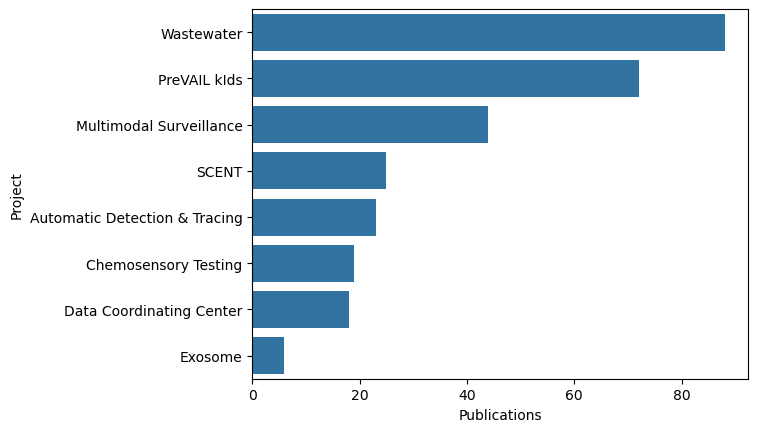

In [19]:
query = """
MATCH (:Publication)<-[:AUTHORED]-(r:Researcher)-[:IS_INVESTIGATOR_OF]->(g:Grant) RETURN COUNT(g) AS Publications, g.subProject AS Project
ORDER BY Publications DESC
"""
publications = graph.run(query).to_data_frame()
sns.barplot(publications, x="Publications", y="Project", legend=False);

### Number of secondary publications (citations)

In [20]:
query = """
MATCH (p:Publication) WHERE p.type = "secondary" RETURN COUNT(p)
"""
print(f"Number of citations: {graph.evaluate(query)}")

Number of citations: 1662


### Number of citations of the primary publications by subprojects

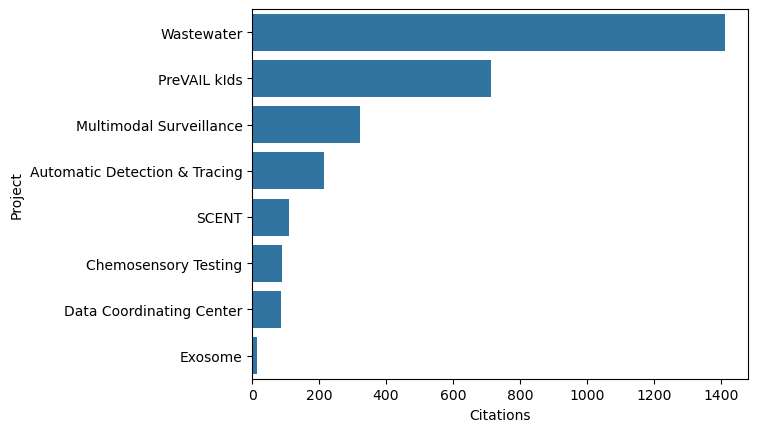

In [21]:
query = """
MATCH (:Publication)-[CITES]-(p:Publication)<-[:AUTHORED]-(r:Researcher)-[:IS_INVESTIGATOR_OF]->(g:Grant) RETURN COUNT(g) AS Citations, g.subProject AS Project
ORDER BY Citations DESC
"""
citations = graph.run(query).to_data_frame()
sns.barplot(citations, x="Citations", y="Project");

### Publications authored by researcher from multiple RADx-rad grants

In [22]:
query = """
MATCH p=(g1:Grant)<-[:IS_INVESTIGATOR_OF]-(r1:Researcher)-[:AUTHORED]->(:Publication)<-[:AUTHORED]-(r2:Researcher)-[:IS_INVESTIGATOR_OF]-(g2:Grant) WHERE g1 <> g2 RETURN p
"""
subgraph = graph.run(query, researcher=researcher).to_subgraph()

In [23]:
widget = neo4j_utils.draw_graph(subgraph, stylesheet)
widget.set_layout(name='cola', padding=0, nodeSpacing=40, nodeDimensionsIncludeLabels=True, unconstrIter=5000)
widget

CytoscapeWidget(cytoscape_layout={'name': 'cola', 'padding': 0, 'nodeSpacing': 40, 'nodeDimensionsIncludeLabel…

## Patents <a class="anchor" id="Patents"></a>

### Number of patents

In [24]:
query = """
MATCH (p:Patent) RETURN COUNT(p)
"""
print(f"Number of patents: {graph.evaluate(query)}")

Number of patents: 17


### Number of patents by RADx-rad subprojects

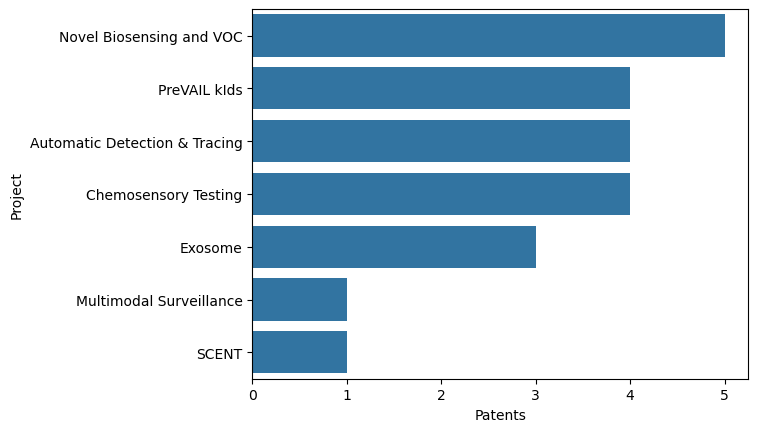

In [25]:
query = """
MATCH (p:Patent)<-[:IS_INVENTOR]-(r:Researcher)-[:IS_INVESTIGATOR_OF]->(g:Grant) RETURN COUNT(p) AS Patents, g.subProject AS Project
ORDER BY Patents DESC
"""
patents = graph.run(query).to_data_frame()
sns.barplot(patents, x="Patents", y="Project");

### Patents with inventors from multiple RADx-rad grants

In [26]:
query = """
MATCH p=(g1:Grant)<-[:IS_INVESTIGATOR_OF]-(r1:Researcher)-[:IS_INVENTOR]->(:Patent)<-[:IS_INVENTOR]-(r2:Researcher)-[:IS_INVESTIGATOR_OF]-(g2:Grant) WHERE g1 <> g2 RETURN p
"""
subgraph = graph.run(query, researcher=researcher).to_subgraph()

In [27]:
widget = neo4j_utils.draw_graph(subgraph, stylesheet)
widget.set_layout(name='cola', padding=0, nodeSpacing=40, nodeDimensionsIncludeLabels=True, unconstrIter=5000)
widget

CytoscapeWidget(cytoscape_layout={'name': 'cola', 'padding': 0, 'nodeSpacing': 40, 'nodeDimensionsIncludeLabel…

## Software <a class="anchor" id="Software"></a>

In [28]:
query = """
MATCH (s:Software)<-[:DEVELOPED]-(r:Researcher)-[:IS_INVESTIGATOR_OF]->(g:Grant) RETURN s.name AS software, s.description AS description, s.url AS url, r.fullName AS developer, g.name AS grant
"""
graph.run(query).to_data_frame()

,software,description,url,developer,grant
0,dbgap-reporter,Jupyter Notebooks to analyze the number of data access requests for dbGaP datasets and publication including RADx datasets.,https://github.com/radxrad/dbgap-reporter,Peter W Rose,RADx-Rad Discoveries & Data: Consortium Coordination Center Program Organization
1,radx-kg,Knowledge Graph of Digital Assets from the NIH Rapid Acceleration of Diagnostics (RADx) initiative.,https://github.com/radxrad/radx-kg,Peter W Rose,RADx-Rad Discoveries & Data: Consortium Coordination Center Program Organization
2,covid-counter,Tools for counting covid sequences.,https://github.com/center4health/covid-counter,Rishi Graham,RADx-Rad Discoveries & Data: Consortium Coordination Center Program Organization
3,auspice_radx,Web app for visualizing pathogen evolution.,https://github.com/DBMI/auspice_radx,Kai Post,RADx-Rad Discoveries & Data: Consortium Coordination Center Program Organization
4,radx,RADx-rad pipeline for metagenomic data and analysis of SARS-CoV-2 from wastewater.,https://github.com/ZooPhy/radx,Matthew Scotch,Bioinformatics Framework for Wastewater-based Surveillance of Infectious Diseases


## Presentations <a class="anchor" id="Presentations"></a>
Presentations include poster presentations.

In [29]:
query = """
MATCH (p:Presentation) RETURN COUNT(p)
"""
print(f"Number of presentations: {graph.evaluate(query)}")

Number of presentations: 87


### Number of presentations by RADx-rad subprojects

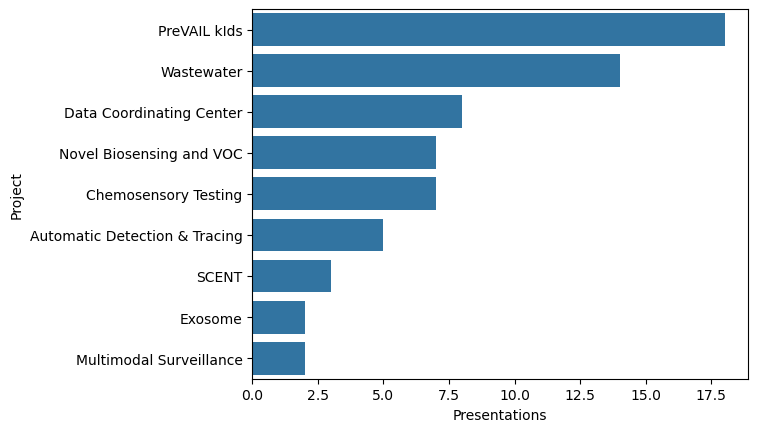

In [30]:
query = """
MATCH (p:Presentation)<-[:PRESENTED]-(r:Researcher)-[:IS_INVESTIGATOR_OF]->(g:Grant) RETURN COUNT(p) AS Presentations, g.subProject AS Project
ORDER BY Presentations DESC
"""
presentations = graph.run(query).to_data_frame()
sns.barplot(presentations, x="Presentations", y="Project");

## Full text query by keyword

In [31]:
keyword = '"aptamer"'

In [32]:
query = """
CALL db.index.fulltext.queryNodes("fulltext", $keyword) YIELD node, score
RETURN node.id as id, LABELS(node)[0] as type, node.name, score
ORDER BY type
"""
graph.run(query, keyword=keyword).to_data_frame()

,id,type,node.name,score
0,dbgap:phs002702.v1.p1,Dataset,A Scalable Aptamer-based Electrochemical Biosensor For Rapid Detection of SARS-CoV-2 From Saliva,1.609287
1,R44DE030852,Grant,Designer DNA Nanostructure Based Biosensing for Rapid COVID19 Detection and Monitoring using Saliva Sample,3.176407
2,R44DE030842,Grant,A scalable aptamer-based electrochemical biosensor for rapid detection of SARS-CoV-2 from saliva,2.941337
3,R61HD105590,Grant,Diagnosing and predicting risk in children with SARS-CoV-2- related illness,1.708164
4,U01AA029316,Grant,"Touchscreen-compatible, real-time electrochemical sensing of SARS-CoV-2",1.512908
5,U01AA029328,Grant,Development of an Automated Diagnostic Platform for SARS-CoV-2 Monitoring in Vulnerable Areas,1.471692
6,U01AA029348,Grant,Detection and Automatic Privacy-Protected Contact Tracing System Designed for COVID-19,1.132357
7,982f2b070830a8bb88ace0042d0100db,Presentation,A Novel Aptamer-based Lateral Flow Assay to Detect SARS-CoV-2,1.812794
8,f10c31d02026ef92e1edd49fbd367226,Presentation,A scalable aptamer-based electrochemical biosensor for rapid detection of SARS--Cov-2 from Saliva,1.609287
9,doi:10.24425/pjvs.2023.145056,Publication,Application of aptamer-based viral detection in animals.,5.126857


In [33]:
neo4j_utils.stop()

Stopping Neo4j......... stopped.
